This problem involves finding the approximate probability that the average lifetime of 100 lightbulbs will be at most 1.1 years, where each lightbulb's lifetime is exponentially distributed with 
𝜆=1/year.

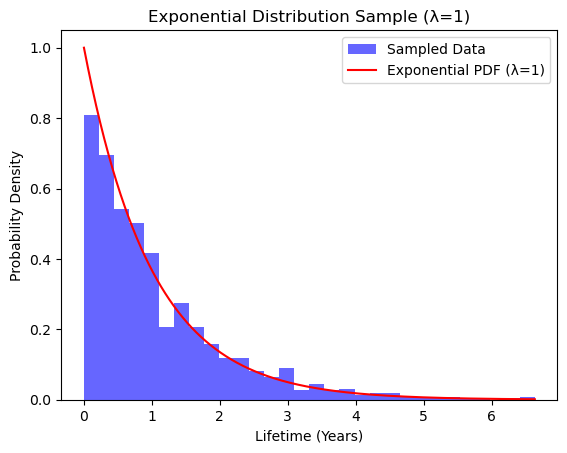

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set the parameters for the exponential distribution
lambda_val = 1  # λ = 1/year
sample_size = 1000  # You can change this to generate more or fewer samples

# Step 2: Generate random samples from the exponential distribution
samples = np.random.exponential(1/lambda_val, sample_size)

# Step 3: Create the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Sampled Data')

# Step 4: Plot the theoretical exponential PDF
x = np.linspace(0, max(samples), 1000)
pdf = lambda_val * np.exp(-lambda_val * x)
plt.plot(x, pdf, 'r-', label='Exponential PDF (λ=1)')

# Step 5: Add labels and legend
plt.title(f'Exponential Distribution Sample (λ={lambda_val})')
plt.xlabel('Lifetime (Years)')
plt.ylabel('Probability Density')
plt.legend()

# Step 6: Show the plot
plt.show()


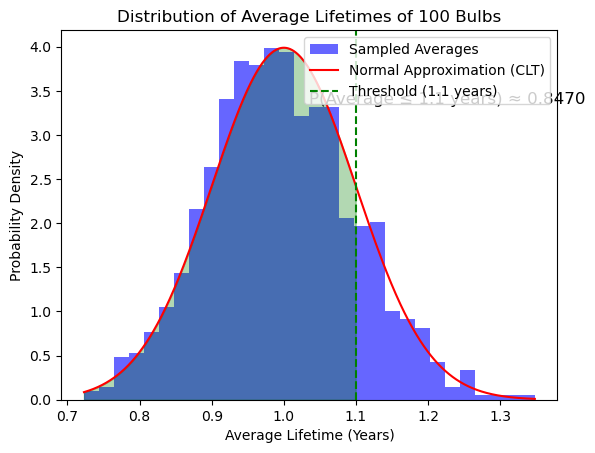

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set parameters
lambda_val = 1  # λ = 1/year
num_bulbs = 100  # Number of bulbs in each trial
num_trials = 1000  # Number of simulations to perform
threshold = 1.1  # The threshold we're interested in

# Step 2: Simulate the averages of lifetimes for 100 bulbs
averages = [np.mean(np.random.exponential(1/lambda_val, num_bulbs)) for _ in range(num_trials)]

# Step 3: Create a histogram of the averages
plt.hist(averages, bins=30, density=True, alpha=0.6, color='b', label='Sampled Averages')

# Step 4: Plot the normal approximation for comparison (CLT)
mean = 1  # Mean of the exponential distribution
std = 1 / np.sqrt(num_bulbs)  # Standard deviation of the sample mean
x = np.linspace(min(averages), max(averages), 1000)
normal_approx = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)
plt.plot(x, normal_approx, 'r-', label='Normal Approximation (CLT)')

# Step 5: Calculate and visualize the probability for averages <= 1.1
count_below_threshold = sum(avg <= threshold for avg in averages)
probability_below_threshold = count_below_threshold / num_trials

# Shade the area below the threshold
plt.axvline(threshold, color='g', linestyle='--', label=f'Threshold (1.1 years)')
plt.fill_between(x, normal_approx, where=(x <= threshold), color='g', alpha=0.3)

# Step 6: Add labels, legend, and display
plt.title(f'Distribution of Average Lifetimes of {num_bulbs} Bulbs')
plt.xlabel('Average Lifetime (Years)')
plt.ylabel('Probability Density')
plt.legend()

# Display the probability result
plt.text(0.5, 0.8, f'P(Average ≤ 1.1 years) ≈ {probability_below_threshold:.4f}', fontsize=12, transform=plt.gca().transAxes)

# Show the plot
plt.show()
